# Практическая работа №7

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y = [475.3, 413.5, 401.7, 400.9, 401.3, 402.5, 401.1, 404.4, 406.2, 412.2, 416.5, 425.8, 435.4, 445.4, 454.6, 466.1, 475.2]
X = [[0.986, 0.978, 0.970, 1.060, 0.880],
     [0.876, 0.858, 0.870, 1.082, 0.840],
     [0.699, 0.690, 0.764, 1.104, 0.480],
     [0.605, 0.619, 0.685, 1.126, 0.475],
     [0.514, 0.559, 0.566, 1.148, 0.525],
     [0.483, 0.492, 0.534, 1.170, 0.575],
     [0.459, 0.501, 0.570, 1.230, 0.582],
     [0.464, 0.506, 0.593, 1.304, 0.539],
     [0.478, 0.430, 0.640, 1.336, 0.512],
     [0.507, 0.587, 0.695, 1.370, 0.519],
     [0.671, 0.777, 0.730, 1.400, 0.617],
     [0.801, 1.109, 0.758, 1.430, 0.624],
     [0.981, 1.267, 0.794, 1.528, 0.634],
     [1.117, 1.425, 0.830, 1.626, 0.656],
     [1.254, 1.583, 0.866, 1.724, 0.682],
     [1.411, 1.741, 0.904, 1.824, 0.729],
     [1.568, 1.899, 1.075, 1.887, 0.780]]

In [3]:
def sigmoid(x):
    # Функция активации sigmoid:: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))
 
 
def deriv_sigmoid(x):
    # Производная от sigmoid: f'(x) = f(x) * (1 - f(x))
    fx = sigmoid(x)
    return fx * (1 - fx)
 
 
def mse_loss(y_true, y_pred):
    # y_true и y_pred являются массивами numpy с одинаковой длиной
    return ((y_true - y_pred) ** 2).mean()

In [8]:
class SmartNeuralNetwork:
    """
    Нейронная сеть, у которой:
        - n входов
        - один скрытый слой с двумя нейронами с n нейронами
        - слой вывода с одним нейроном
    """

    def __init__(self, n):
        self.n = n
        # Веса
        self.weights = [np.random.normal() for i in range(n * n + n)]

        # Смещения
        self.offsets = [np.random.normal() for i in range(n + 1)]

        # Нейроны
        self.h = [0] * n

    def feedforward(self, x):
        # x является массивом numpy

        k = 0
        for i in range(self.n):
            s = 0
            for j in range(self.n):
                s += self.weights[k] * x[j]
                k += 1
            self.h[i] = sigmoid(s + self.offsets[i])
        s = 0
        for i in range(self.n):
            s += self.weights[k] * self.h[i]
            k += 1
        return sigmoid(s + self.offsets[-1])

    def train(self, X, y, learn_rate=0.1, epochs=10000, with_test=False, X_test=None, y_test=None, plot=False):
        """
        - X is a (m x n) numpy array, m = # of samples in the dataset.
        - y is a numpy array with n elements.
        """
        train_loss = []
        test_loss = []

        for epoch in range(epochs):
            for x, y_true in zip(X, y):
                # --- Выполняем обратную связь (нам понадобятся эти значения в дальнейшем)
                y_pred = self.feedforward(x)

                # ---Подсчет частных производных
                d_L_d_ypred = -2 * (y_true - y_pred)
                d_ypred_d_h = []

                # Выходной нейрнон
                for i in range(self.n):
                    d_ypred_d_h.append(self.h[i] * deriv_sigmoid(y_pred))
                d_ypred_d_b = deriv_sigmoid(y_pred)

                # Нейроны основного слоя
                k = 0
                dh_dw = []
                dh_db = []
                for i in range(self.n):
                    for j in range(self.n):
                        dh_dw.append(x[j] * deriv_sigmoid(self.h[i]))
                    dh_db.append(deriv_sigmoid(self.h[i]))

                # --- Обновляем вес и смещения
                for i in range(self.n):
                    for j in range(self.n):
                        self.weights[i * self.n + j] -= learn_rate * d_L_d_ypred * dh_dw[i * self.n + j] * d_ypred_d_h[
                            i]
                    self.offsets[i] -= learn_rate * d_L_d_ypred * d_ypred_d_h[i] * dh_db[i]

                for i in range(self.n):
                    self.weights[self.n * self.n + i] -= learn_rate * d_L_d_ypred * d_ypred_d_h[i]
                self.offsets[-1] -= learn_rate * d_L_d_ypred * d_ypred_d_b

            # --- Подсчитываем общую потерю в конце каждой фазы
            y_preds = np.apply_along_axis(self.feedforward, 1, X)
            train_loss.append(mse_loss(y, y_preds))
            if with_test:
                y_preds2 = np.apply_along_axis(self.feedforward, 1, X_test)
                test_loss.append(mse_loss(y_test, y_preds2))
            if epoch % 10 == 0:
                print("Epoch %d loss: %.3f" % (epoch, mse_loss(y, y_preds)))
        if plot:
            plt.plot(train_loss, label='MSE тренировочных данных')
            plt.plot(test_loss, label='MSE тестовой выборки')
            plt.show()

In [9]:
X_train = np.array(X[0:12])
X_test = np.array(X[12:])
y_train = np.array(y[0:12])
y_test = np.array(y[12:])

Epoch 0 loss: 170518.243
Epoch 10 loss: 170518.243
Epoch 20 loss: 170518.243
Epoch 30 loss: 170518.243
Epoch 40 loss: 170518.243
Epoch 50 loss: 170518.243
Epoch 60 loss: 170518.243
Epoch 70 loss: 170518.243
Epoch 80 loss: 170518.243
Epoch 90 loss: 170518.243
Epoch 100 loss: 170518.243
Epoch 110 loss: 170518.243
Epoch 120 loss: 170518.243
Epoch 130 loss: 170518.243
Epoch 140 loss: 170518.243
Epoch 150 loss: 170518.243
Epoch 160 loss: 170518.243
Epoch 170 loss: 170518.243
Epoch 180 loss: 170518.243
Epoch 190 loss: 170518.243
Epoch 200 loss: 170518.243
Epoch 210 loss: 170518.243
Epoch 220 loss: 170518.243
Epoch 230 loss: 170518.243
Epoch 240 loss: 170518.243
Epoch 250 loss: 170518.243
Epoch 260 loss: 170518.243
Epoch 270 loss: 170518.243
Epoch 280 loss: 170518.243
Epoch 290 loss: 170518.243
Epoch 300 loss: 170518.243
Epoch 310 loss: 170518.243
Epoch 320 loss: 170518.243
Epoch 330 loss: 170518.243
Epoch 340 loss: 170518.243
Epoch 350 loss: 170518.243
Epoch 360 loss: 170518.243
Epoch 370 lo

Epoch 3000 loss: 170518.243
Epoch 3010 loss: 170518.243
Epoch 3020 loss: 170518.243
Epoch 3030 loss: 170518.243
Epoch 3040 loss: 170518.243
Epoch 3050 loss: 170518.243
Epoch 3060 loss: 170518.243
Epoch 3070 loss: 170518.243
Epoch 3080 loss: 170518.243
Epoch 3090 loss: 170518.243
Epoch 3100 loss: 170518.243
Epoch 3110 loss: 170518.243
Epoch 3120 loss: 170518.243
Epoch 3130 loss: 170518.243
Epoch 3140 loss: 170518.243
Epoch 3150 loss: 170518.243
Epoch 3160 loss: 170518.243
Epoch 3170 loss: 170518.243
Epoch 3180 loss: 170518.243
Epoch 3190 loss: 170518.243
Epoch 3200 loss: 170518.243
Epoch 3210 loss: 170518.243
Epoch 3220 loss: 170518.243
Epoch 3230 loss: 170518.243
Epoch 3240 loss: 170518.243
Epoch 3250 loss: 170518.243
Epoch 3260 loss: 170518.243
Epoch 3270 loss: 170518.243
Epoch 3280 loss: 170518.243
Epoch 3290 loss: 170518.243
Epoch 3300 loss: 170518.243
Epoch 3310 loss: 170518.243
Epoch 3320 loss: 170518.243
Epoch 3330 loss: 170518.243
Epoch 3340 loss: 170518.243
Epoch 3350 loss: 170

Epoch 5950 loss: 170518.243
Epoch 5960 loss: 170518.243
Epoch 5970 loss: 170518.243
Epoch 5980 loss: 170518.243
Epoch 5990 loss: 170518.243
Epoch 6000 loss: 170518.243
Epoch 6010 loss: 170518.243
Epoch 6020 loss: 170518.243
Epoch 6030 loss: 170518.243
Epoch 6040 loss: 170518.243
Epoch 6050 loss: 170518.243
Epoch 6060 loss: 170518.243
Epoch 6070 loss: 170518.243
Epoch 6080 loss: 170518.243
Epoch 6090 loss: 170518.243
Epoch 6100 loss: 170518.243
Epoch 6110 loss: 170518.243
Epoch 6120 loss: 170518.243
Epoch 6130 loss: 170518.243
Epoch 6140 loss: 170518.243
Epoch 6150 loss: 170518.243
Epoch 6160 loss: 170518.243
Epoch 6170 loss: 170518.243
Epoch 6180 loss: 170518.243
Epoch 6190 loss: 170518.243
Epoch 6200 loss: 170518.243
Epoch 6210 loss: 170518.243
Epoch 6220 loss: 170518.243
Epoch 6230 loss: 170518.243
Epoch 6240 loss: 170518.243
Epoch 6250 loss: 170518.243
Epoch 6260 loss: 170518.243
Epoch 6270 loss: 170518.243
Epoch 6280 loss: 170518.243
Epoch 6290 loss: 170518.243
Epoch 6300 loss: 170

Epoch 8890 loss: 170518.243
Epoch 8900 loss: 170518.243
Epoch 8910 loss: 170518.243
Epoch 8920 loss: 170518.243
Epoch 8930 loss: 170518.243
Epoch 8940 loss: 170518.243
Epoch 8950 loss: 170518.243
Epoch 8960 loss: 170518.243
Epoch 8970 loss: 170518.243
Epoch 8980 loss: 170518.243
Epoch 8990 loss: 170518.243
Epoch 9000 loss: 170518.243
Epoch 9010 loss: 170518.243
Epoch 9020 loss: 170518.243
Epoch 9030 loss: 170518.243
Epoch 9040 loss: 170518.243
Epoch 9050 loss: 170518.243
Epoch 9060 loss: 170518.243
Epoch 9070 loss: 170518.243
Epoch 9080 loss: 170518.243
Epoch 9090 loss: 170518.243
Epoch 9100 loss: 170518.243
Epoch 9110 loss: 170518.243
Epoch 9120 loss: 170518.243
Epoch 9130 loss: 170518.243
Epoch 9140 loss: 170518.243
Epoch 9150 loss: 170518.243
Epoch 9160 loss: 170518.243
Epoch 9170 loss: 170518.243
Epoch 9180 loss: 170518.243
Epoch 9190 loss: 170518.243
Epoch 9200 loss: 170518.243
Epoch 9210 loss: 170518.243
Epoch 9220 loss: 170518.243
Epoch 9230 loss: 170518.243
Epoch 9240 loss: 170

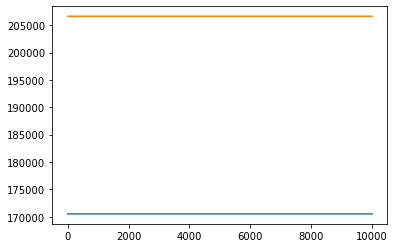

1.0


In [10]:
net = SmartNeuralNetwork(4)
net.train(X_train, y_train, with_test=True, plot=True, X_test=X_test, y_test=y_test)
print(net.feedforward(X_test[-1]))